A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

In [24]:
# pyplot for plotting
import matplotlib.pyplot as plt
# numpy for vectorized array operations
import numpy as np
# pandas for proper tabular manipulation
import pandas as pd
# scipy stats for our subversions
from scipy import stats
from scipy.stats import poisson
from scipy.stats import norm

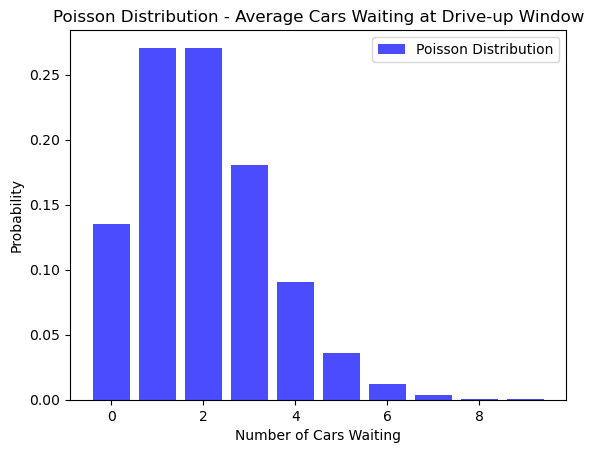

In [37]:
# Set the mean for the Poisson distribution
mean_cars = 2

# Generate x values (number of cars waiting)
x_values = np.arange(0, 10)

# Calculate the PMF for each x value
pmf_values = poisson.pmf(x_values, mu=mean_cars)

# Plot the Poisson distribution
plt.bar(x_values, pmf_values, color='blue', alpha=0.7, label='Poisson Distribution')
plt.title('Poisson Distribution - Average Cars Waiting at Drive-up Window')
plt.xlabel('Number of Cars Waiting')
plt.ylabel('Probability')
plt.legend()
plt.show()
# This code uses scipy.stats.poisson.pmf to calculate the PMF for each possible number of cars waiting and then uses matplotlib.pyplot.bar to plot the distribution.

What is the probability that no cars drive up in the noon hour?

In [26]:
prob_zero_cars = poisson.pmf(0, mu=mean_cars)
print(f"The probability of 0 cars waiting is {prob_zero_cars:.4f}")

The probability of 0 cars waiting is 0.1353


What is the probability that 3 or more cars come through the drive through?

In [27]:
# Calculate the probability of 2 or fewer cars (opposite of 3 or more)
prob_2_or_fewer_cars = poisson.cdf(2, mu=mean_cars)

# Probability of 3 or more cars
prob_3_or_more_cars = 1 - prob_2_or_fewer_cars

print(f"The probability of 3 or more cars is {prob_3_or_more_cars:.4f}")

The probability of 3 or more cars is 0.3233


How likely is it that the drive through gets at least 1 car?

In [28]:
# Probability of 0 cars
prob_0_cars = poisson.pmf(0, mu=mean_cars)

# Probability of at least 1 car
prob_at_least_1_car = 1 - prob_0_cars

print(f"The probability of getting at least 1 car is {prob_at_least_1_car:.4f}")

The probability of getting at least 1 car is 0.8647


Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?

In [29]:
μ = 3.0
σ = .3

grades = stats.norm(μ, σ)

top_5_percent_cutoff = grades.ppf(.95)

print('{:,.2f}'.format(top_5_percent_cutoff))


3.49


What GPA constitutes the bottom 15% of the class?

In [30]:
bottom_15_percent = grades.ppf(.15)

print('{:,.2f}'.format(bottom_15_percent))

2.69


An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

In [31]:
# Calculate GPAs for the 20th and 30th percentiles
gpa_20 = norm.ppf(0.2, μ, σ)
gpa_30 = norm.ppf(0.3, μ, σ)

# Determine the range of the third decile
decile_range = gpa_30 - gpa_20

gpa_20, gpa_30, decile_range

# Yes a student with a 2.8 gpa would qualify for the scholarship

(2.7475136299281258, 2.842679846187588, 0.0951662162594622)

If I have a GPA of 3.5, what percentile am I in?

In [32]:
student_gpa = 3.5

# Use the CDF to find the percentile
percentile = norm.cdf(student_gpa, μ, σ) * 100

percentile

95.22096477271853

A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [33]:
# Given values
total_visitors = 4326
clicks_observed = 97
click_through_rate = 0.02  # 2%

# Probability of success in a single trial
p_success = click_through_rate

# Calculate the probability of getting 96 click-throughs or fewer
prob_less_than_97 = stats.binom.cdf(clicks_observed - 1, total_visitors, p_success)

# Calculate the probability of getting 97 click-throughs or more
prob_97_or_more = 1 - prob_less_than_97

print(f"The probability of 97 click-throughs or more is approximately {prob_97_or_more:.4f}")
#This code uses the cumulative distribution function (stats.binom.cdf) from the scipy.stats module to calculate the probability of getting 96 click-throughs or fewer. Subtracting this probability from 1 gives us the probability of getting 97 click-throughs or more. The result will be the likelihood of observing 97 or more click-throughs in 4326 visitors with an average click-through rate of 2%.

The probability of 97 click-throughs or more is approximately 0.1398


You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

What is the probability that at least one of your first 60 answers is correct?

In [38]:
# Given values
total_questions = 100
correct_answer_probability = 1 / 101  # Assuming random guessing

# Probability of getting at least one correct answer in the first 60 questions
prob_at_least_one_correct = 1 - (1 - correct_answer_probability)**60

print(f"The probability of getting at least one correct answer in the first 60 questions is approximately {prob_at_least_one_correct:.4f}")

The probability of getting at least one correct answer in the first 60 questions is approximately 0.4496


The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [19]:
# Given values
clean_probability = 0.03
students_per_cohort = 22
active_cohorts = 3
daily_visit_probability = 0.9
days_in_week = 5

# Calculate total number of students
total_students = int(daily_visit_probability * active_cohorts * students_per_cohort)

# Probability that a student cleans up each day
probability_clean_each_day = clean_probability * total_students

# Probability that no student cleans up each day
probability_not_clean_each_day = (1 - clean_probability) ** total_students

# Probability that no student cleans up for two days
probability_not_clean_two_days = probability_not_clean_each_day ** 2

# Probability that no student cleans up for a week (five days)
probability_not_clean_week = probability_not_clean_each_day ** days_in_week

# Probability that the break area gets cleaned up each day
probability_cleaned_each_day = 1 - probability_not_clean_each_day

print(f"Probability that the break area gets cleaned up each day: {probability_cleaned_each_day:.4f}")
print(f"Probability that it goes two days without getting cleaned up: {probability_not_clean_two_days:.6f}")
print(f"Probability that it goes a week without getting cleaned up: {probability_not_clean_week:.6f}")


Probability that the break area gets cleaned up each day: 0.8342
Probability that it goes two days without getting cleaned up: 0.027483
Probability that it goes a week without getting cleaned up: 0.000125


You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [34]:
import scipy.stats as stats

# Given values
mean_people_in_line = 15
std_dev_people_in_line = 3
time_per_person_to_order = 2
time_waiting_for_food = 10
total_lunchtime = 60

# Calculate the expected number of people in line after 60 minutes
expected_people_in_line_60_minutes = mean_people_in_line + (60 - total_lunchtime) / time_per_person_to_order

# Calculate the standard deviation of the number of people in line after 60 minutes
std_dev_people_in_line_60_minutes = std_dev_people_in_line * (60 / total_lunchtime) ** 0.5

# Calculate the probability that the number of people in line after 60 minutes is less than or equal to 15
probability_less_than_or_equal_15 = stats.norm.cdf(15, loc=expected_people_in_line_60_minutes, scale=std_dev_people_in_line_60_minutes)

# Calculate the time available to eat
time_available_to_eat = total_lunchtime - (expected_people_in_line_60_minutes * time_per_person_to_order + time_waiting_for_food)

# Calculate the probability that you have at least 15 minutes left to eat
probability_at_least_15_minutes = stats.norm.cdf(15, loc=expected_people_in_line_60_minutes, scale=std_dev_people_in_line_60_minutes)

print(f"Probability that you have at least 15 minutes left to eat: {probability_at_least_15_minutes:.4f}")


Probability that you have at least 15 minutes left to eat: 0.5000


Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [35]:
import env
from env import host, username, password

url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/employees'


In [36]:
pd.read_sql('SELECT * FROM departments', url)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing
5,d004,Production
6,d006,Quality Management
7,d008,Research
8,d007,Sales


In [39]:
query = '''
select * from salaries s where s.to_date > now()
'''

In [41]:
df = pd.read_sql(query, url)

In [42]:
df

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [43]:
sal_stats = df.salary.agg(['mean', 'std'])

In [44]:
sal_stats.values

array([72012.23585731, 17309.99538025])

In [45]:
# * is to unpack positional args from an interable in the correct order, ** will unpack kwargs from a dictionary
salary_dist = stats.norm(*sal_stats.values)

What percent of employees earn less than 60,000?

In [46]:
round(salary_dist.cdf(60_000), 2)

0.24

What percent of employees earn more than 95,000?

In [48]:
round(salary_dist.sf(95_000), 2)

0.09

In [49]:
high_sal, lower_sal = salary_dist.cdf([80_000, 65_000])
salary_bracket = high_sal - lower_sal

In [50]:
round(salary_bracket, 2)

0.34

What do the top 5% of employees make?

In [51]:
salary_dist.isf(0.05)

100484.64454102777

In [52]:
salary_dist.ppf(0.95)

100484.64454102775